**Introduction**

**In this project, you will extract, clean and visualize the dataset from IBM employee attribution and the possible factors for employee attrition. Your task is seen below: 
Using the attr_data.db, extract all the data from the only table in the database using SQL. Once the data is extracted, import the data into Pandas and continue with the analysis. 
The following questions should be answered:**

a)What do you think are the 3 factors behind employee attrition?
b)What is the relationship between Education and Monthly Income?
c)What is the effect of age on attrition?
d)Is Income the main factor in employee attrition?
e)How does work-life balance impact the overall attrition rate?

In [1]:
#importing libraries 
import sqlite3 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline

In [2]:
#importing database and connecting cursor object. 
conn= sqlite3.connect("attr_data.db")
cursor= conn.cursor()
print("cursor created successfully \n", type(cursor))

cursor created successfully 
 <class 'sqlite3.Cursor'>


In [3]:
#viewing table name from sqlite_schema
sql= """ SELECT name 
FROM sqlite_schema
WHERE type= 'table';
"""
cursor= conn.cursor()
cursor.execute(sql) 
#fetching result
result= cursor.fetchall()
result 

[('attrition_records',), ('sqlite_sequence',)]

In [4]:
#Selecting all From sqlite_sequence
sql=""" SELECT *
FROM sqlite_sequence"""
cursor.execute(sql)
result=cursor.fetchall()
result 

[('attrition_records', 1470)]

In [5]:
#extracting the database and visualizing the database using pandas. 
sql= "SELECT*FROM attrition_records"

cursor.execute(sql)

result= cursor.fetchall()

result 

df =pd.read_sql(sql, conn)

df.head()


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


**CHECKING THE PROPERTIES OF THE DATABASE**

In [22]:
#Describing the database 
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
df.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [34]:
feature_set.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**Checking for the overall Attrition Rate**

In [8]:
#Checking for Attrition rate using Value_Coubt
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:ylabel='Attrition'>

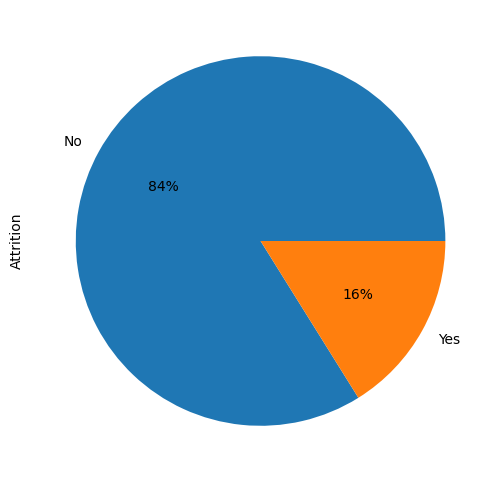

In [9]:
#Checking for overall Attrition Rate using pie chart
df.Attrition.value_counts().plot(kind='pie',
                                 autopct='%1.0f%%',
                                 figsize=(12, 6))

In [10]:
#Checking the properties of individual Factors. 
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("__________________________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
__________________________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
__________________________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
__________________________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
______________________

In [26]:
#checking for the categorical data of the 
categorical = df.select_dtypes(include = ['object'])
print(categorical.columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [27]:
#Checking of the numerical database
numerical = df.select_dtypes(include=['float64','int64'])
print((numerical.columns))

Index(['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


/data/user/0/ru.iiec.pydroid3/cache/ipykernel_6190/3052553615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax = ax[4,1])
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_6190/3052553615.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['id'], ax = ax[4,2])
/data/user/0/ru.iie

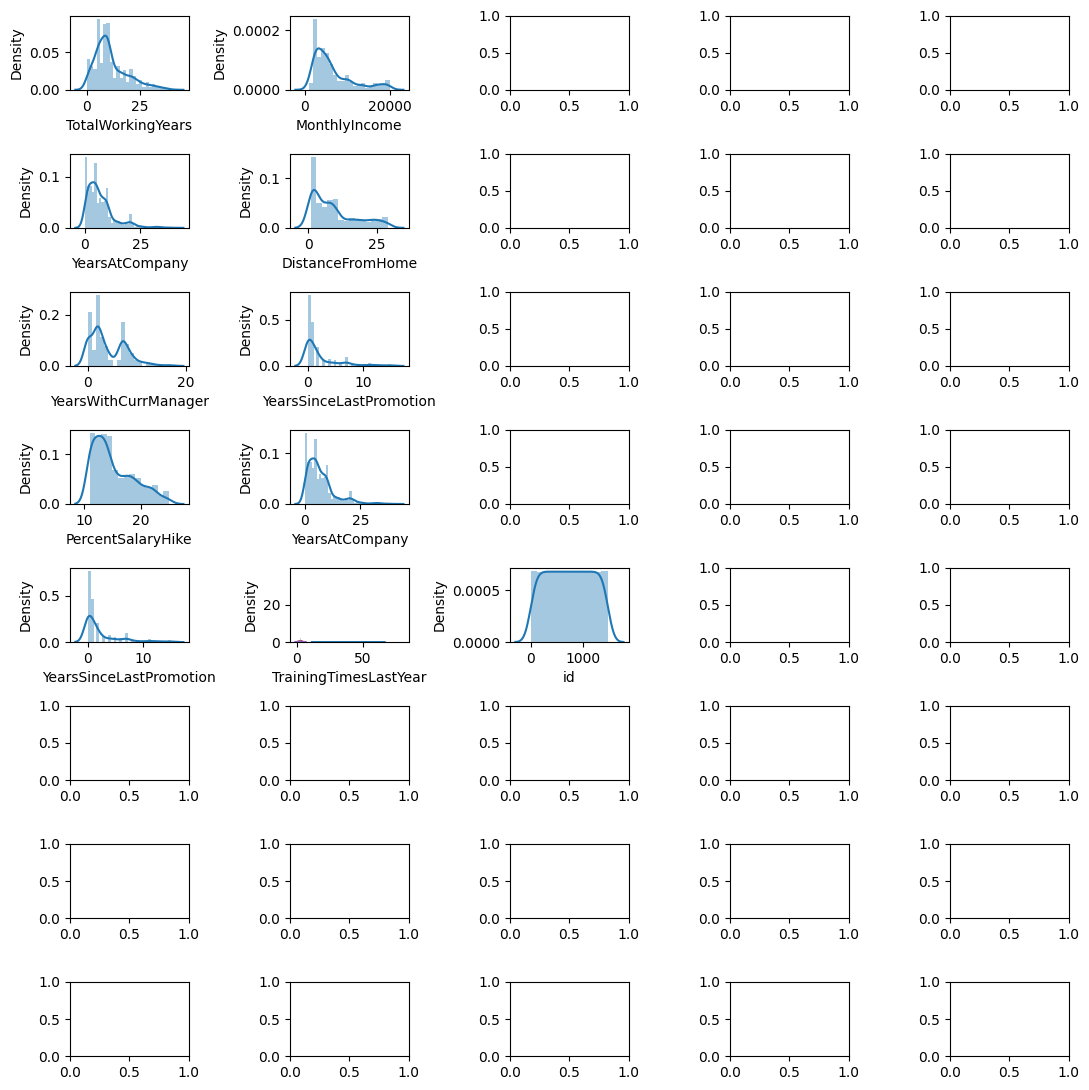

In [28]:
fig, ax = plt.subplots(8,5, figsize=(11,11))
sns.distplot(df['Age'], ax = ax[4,1])
sns.distplot(df['id'], ax = ax[4,2])
sns.distplot(df['EmployeeCount'], ax = ax[4,1])
sns.distplot(df['StandardHours'], ax = ax[4,1])
sns.distplot(df['RelationshipSatisfaction'], ax = ax[4,1])
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(df['MonthlyIncome'], ax = ax[0,1])
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])
sns.distplot(df['DistanceFromHome'], ax = ax[1,1])
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,0])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,1])
sns.distplot(df['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(df['YearsAtCompany'], ax = ax[3,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()


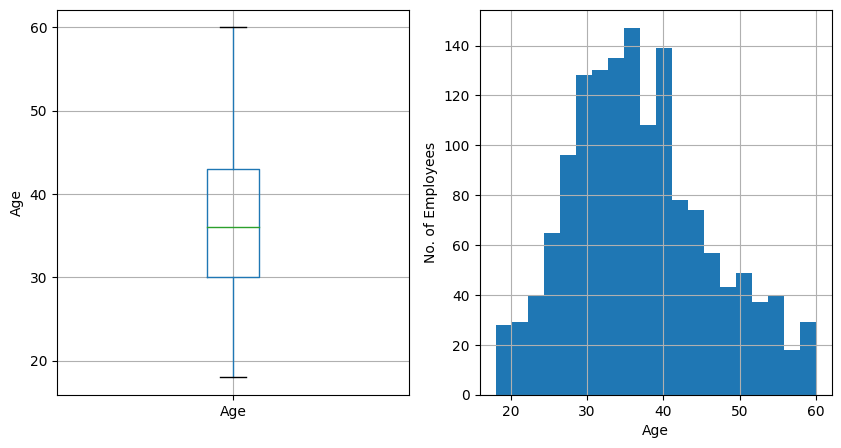

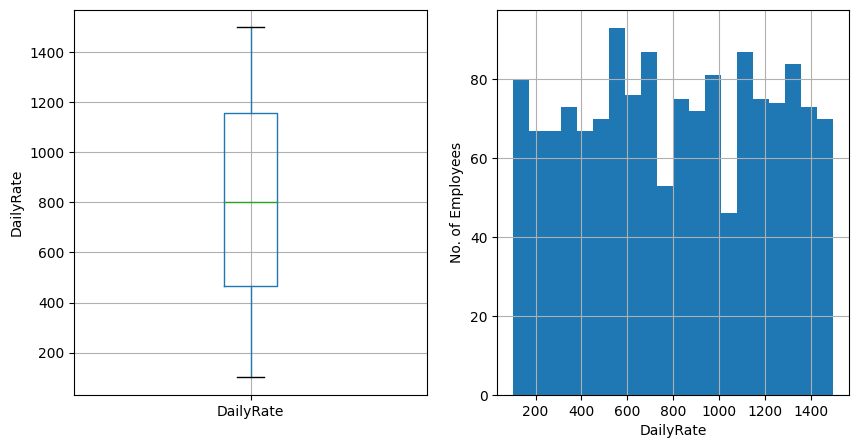

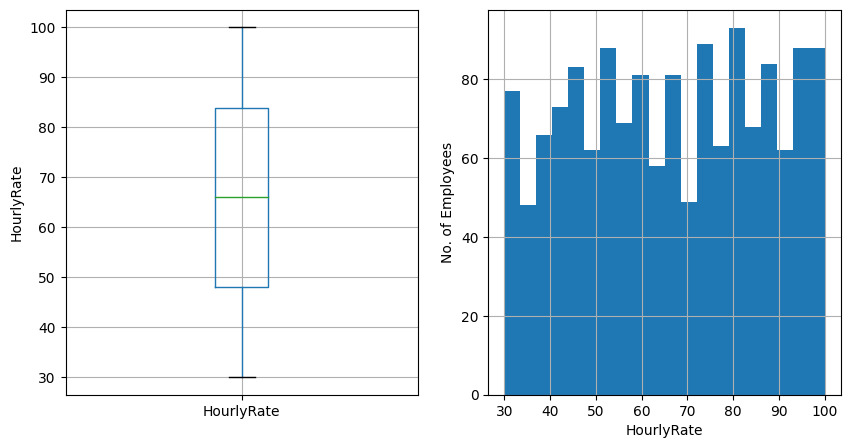

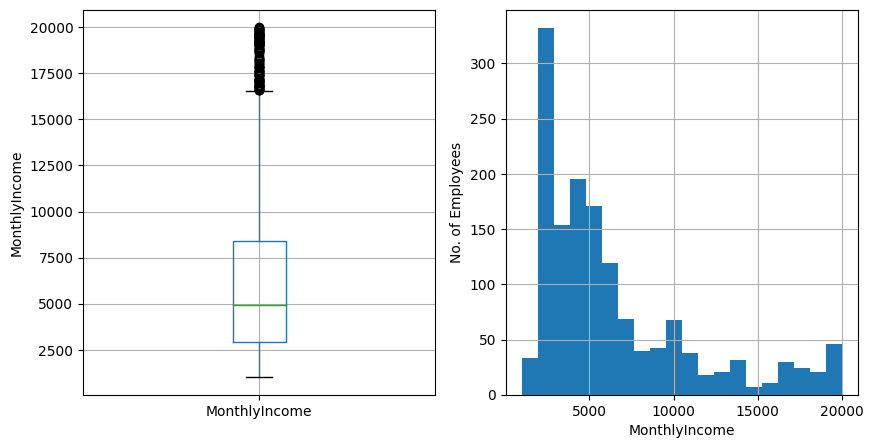

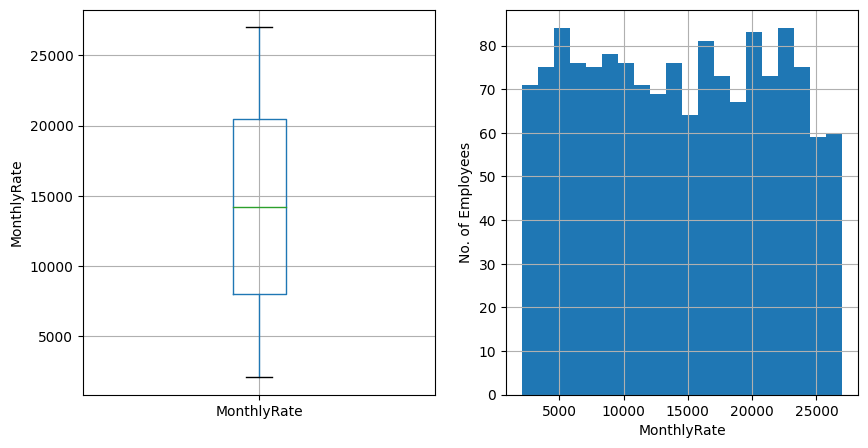

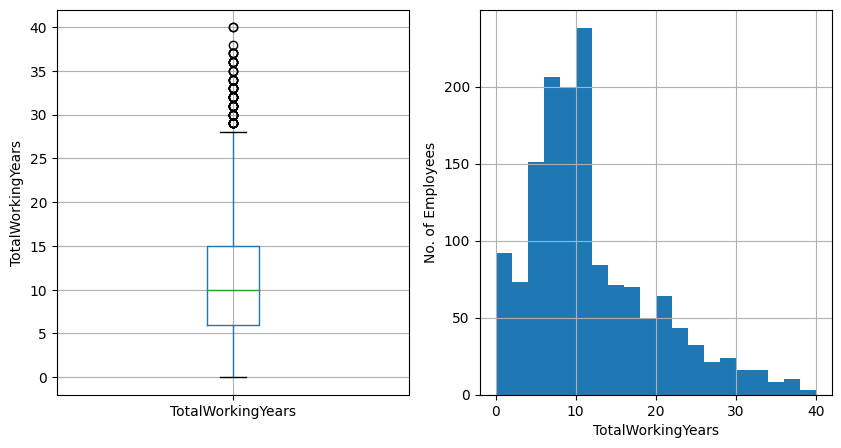

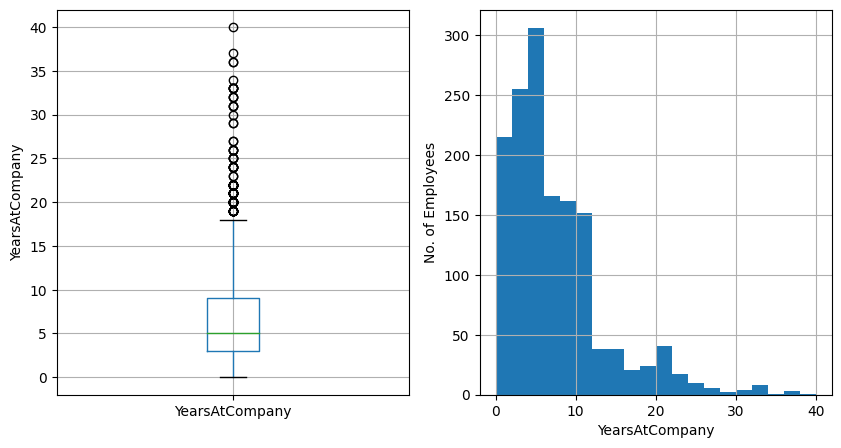

In [29]:
continious = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]
for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = df.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = df[var].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(var)
    
   

**converting categorical columns in our dataset to numeric columns. Let's do that now.**


In [15]:
feature_set =df.drop(['Attrition'], axis= 1)
labels = df.filter(['Attrition'], axis=1)

In [16]:

cat_col_names = ['Over18',
                 'BusinessTravel',
                       'Department',
                       'EducationField',
                       'Gender',
                       'JobRole',
                       'MaritalStatus',
                      'OverTime'
                      ]
num_cols = feature_set.drop(cat_col_names, axis=1)
cat_columns = feature_set.filter(cat_col_names, axis = 1)

In [17]:
cat_columns_one_hot = pd.get_dummies(cat_columns, drop_first=True)
cat_columns_one_hot.shape

(1470, 21)

**concatenation**

In [18]:
 
X = pd.concat([num_cols,cat_columns_one_hot], axis=1)
X.shape

(1470, 48)

In [19]:
y =  labels['Attrition'].map({'Yes': 1, 'No': 0})
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)


In [41]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))
pd.DataFrame[(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

0.8707482993197279


ValueError: DataFrame constructor not properly called!

**Checking for Factors with the highest Chances of leading to Attrition**

<AxesSubplot:>

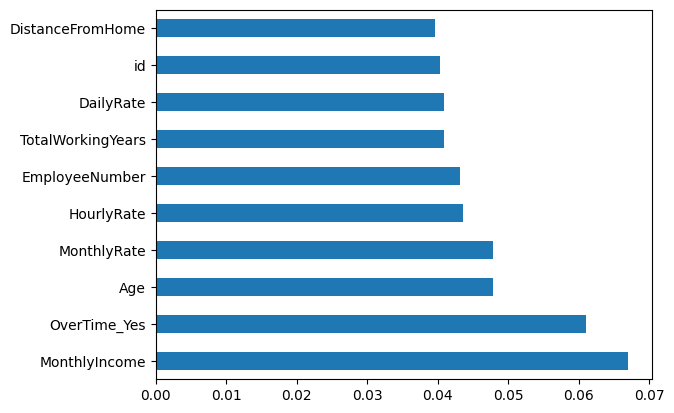

In [30]:
important_features = pd.Series(rf_clf.feature_importances_, index=X.columns)
important_features.nlargest(10).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

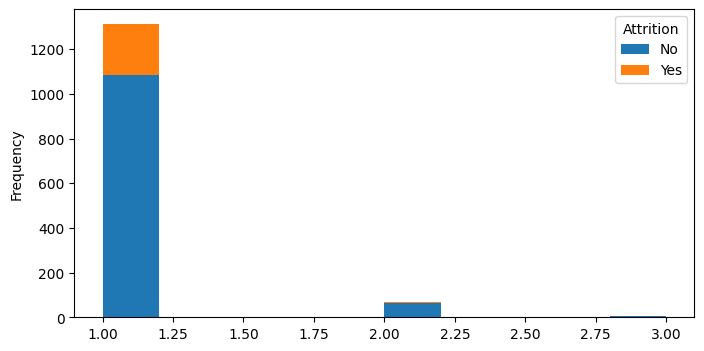

In [45]:
df.groupby(['MonthlyIncome','Attrition']).size().unstack().plot(kind='hist',
                                                               stacked=True,
                                                                    figsize=(8, 4))

<AxesSubplot:xlabel='OverTime'>

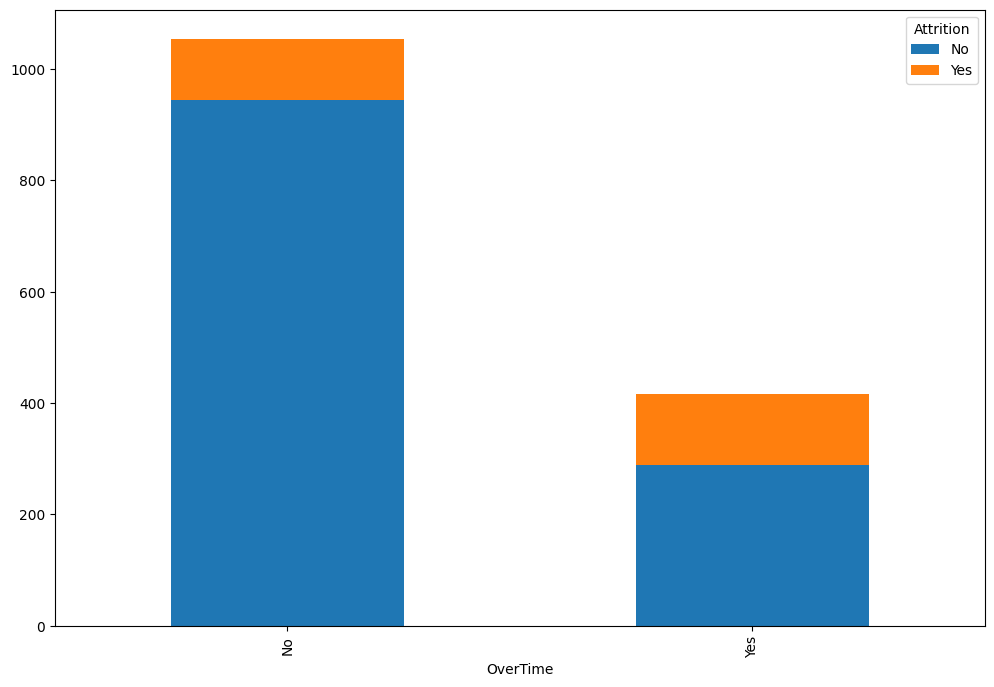

In [9]:
df.groupby(['OverTime','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='JobRole'>

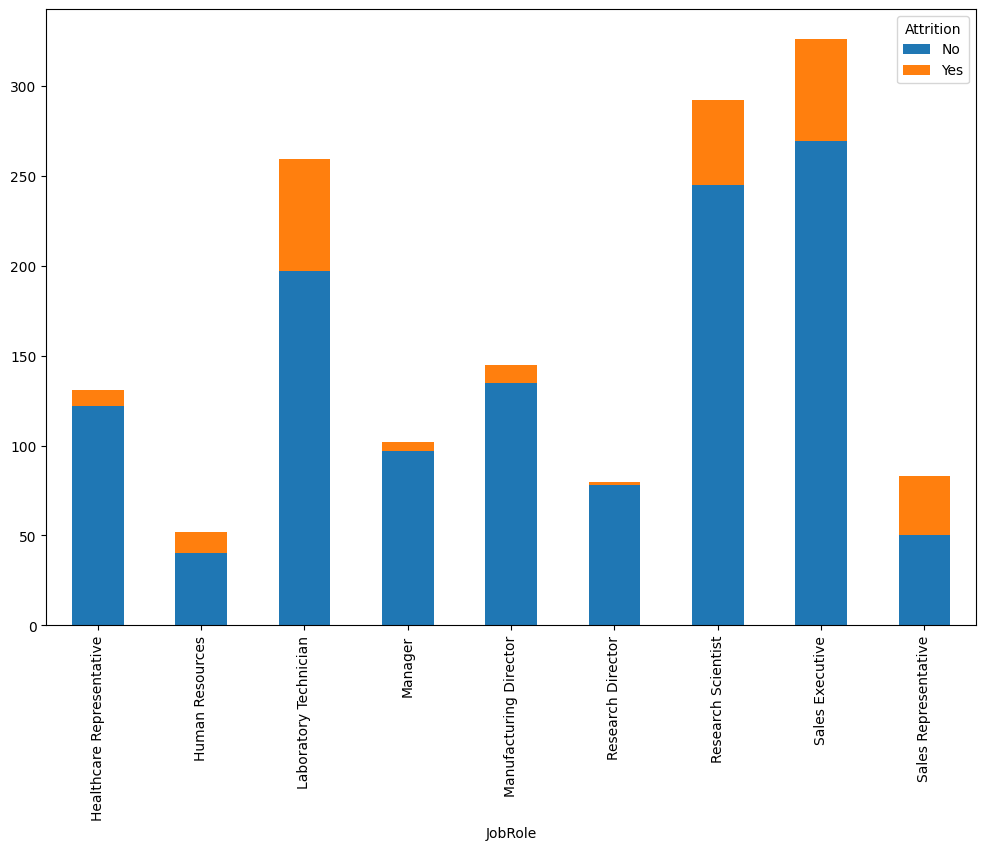

In [38]:
df.groupby(['JobRole','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='Gender'>

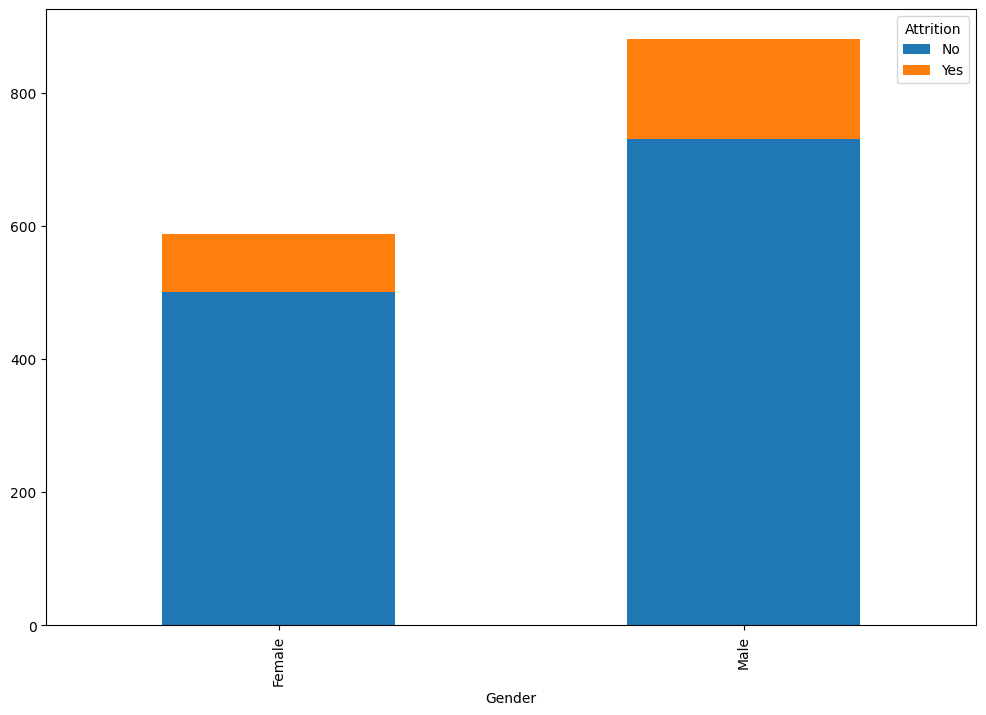

In [35]:
df.groupby(['Gender','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='Age'>

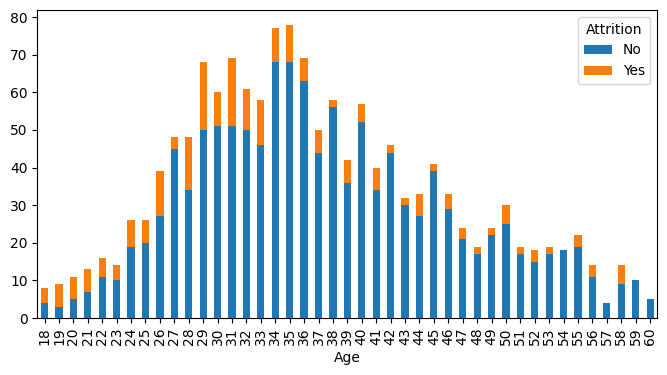

In [36]:
df.groupby(['Age','Attrition']).size().unstack().plot(kind='bar',
                                                        stacked=True,
                                                                    figsize=(8, 4))

<AxesSubplot:xlabel='JobInvolvement'>

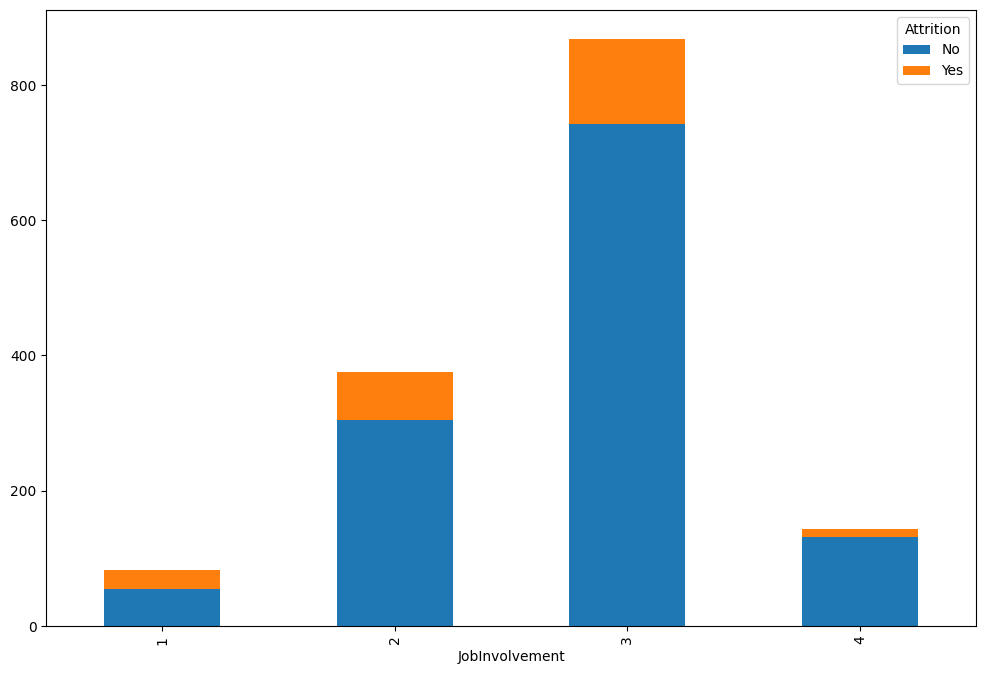

In [10]:
df.groupby(['JobInvolvement','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='PerformanceRating'>

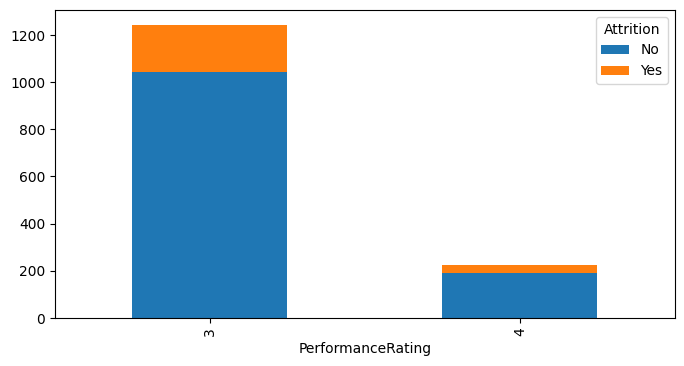

In [11]:
df.groupby(['PerformanceRating','Attrition']).size().unstack().plot(kind='bar',
                                                                    stacked=True,
                                                                    figsize=(8, 4))

<AxesSubplot:xlabel='DistanceFromHome'>

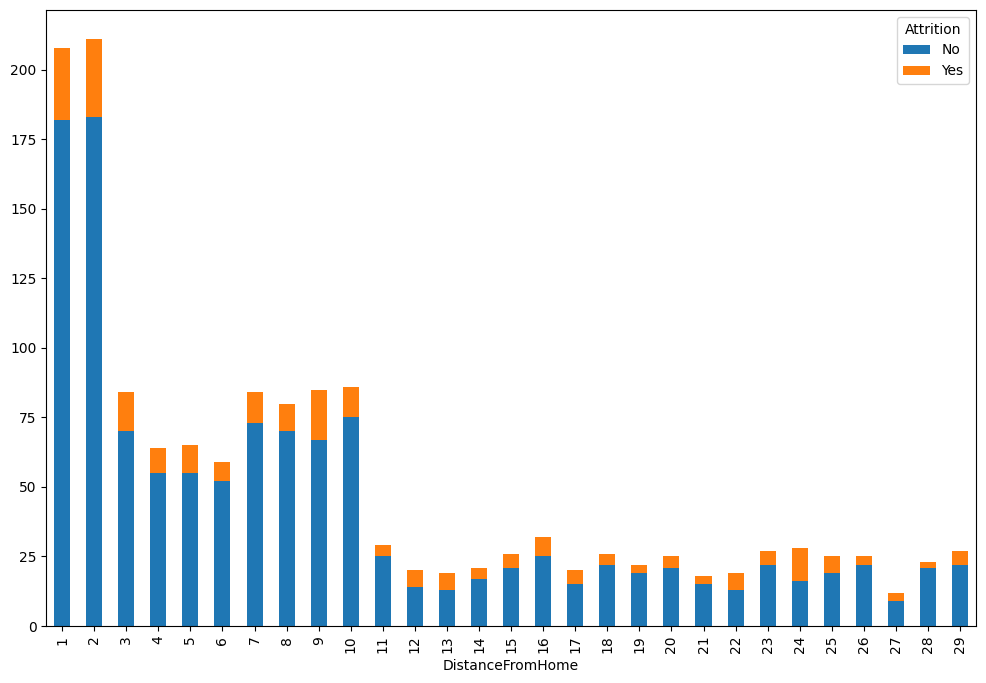

In [12]:
df.groupby(['DistanceFromHome','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='NumCompaniesWorked'>

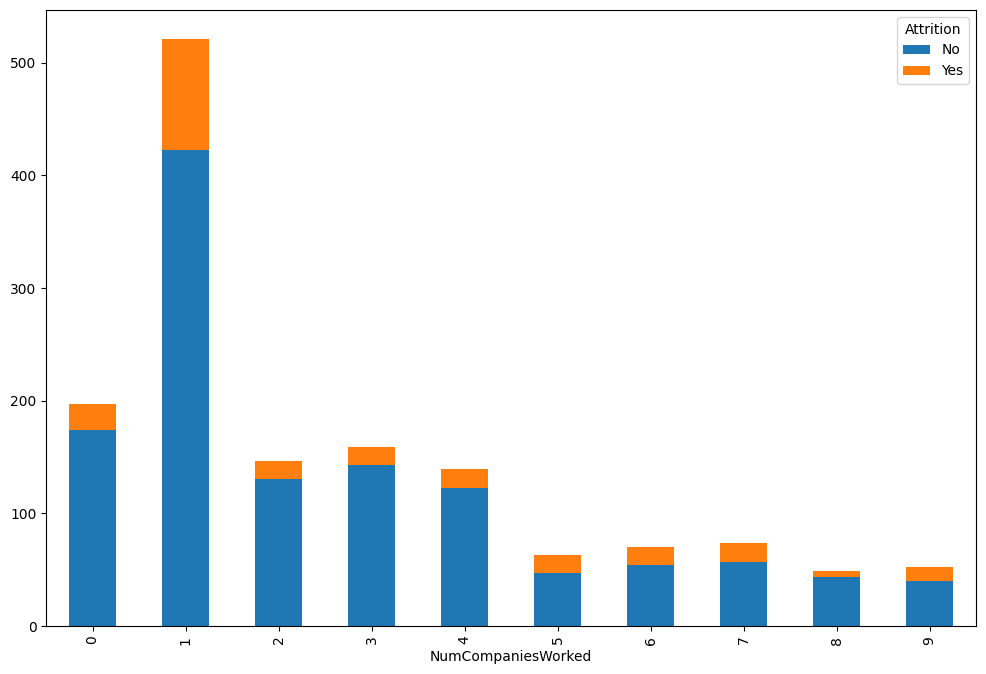

In [34]:
df.groupby(['NumCompaniesWorked','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='JobSatisfaction'>

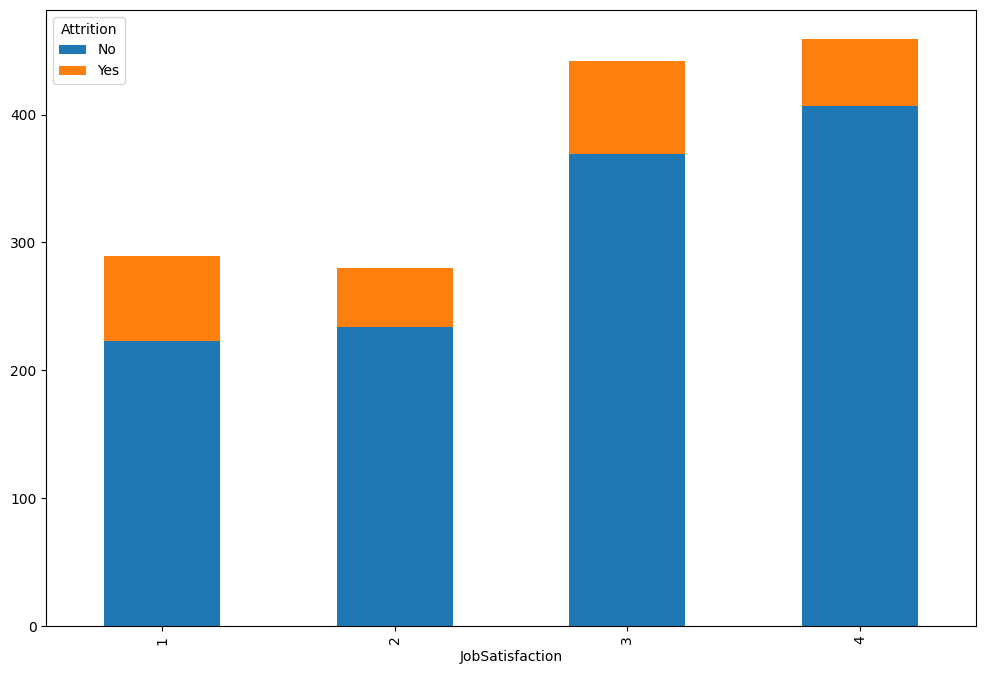

In [32]:
df.groupby(['JobSatisfaction','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

<AxesSubplot:xlabel='MaritalStatus'>

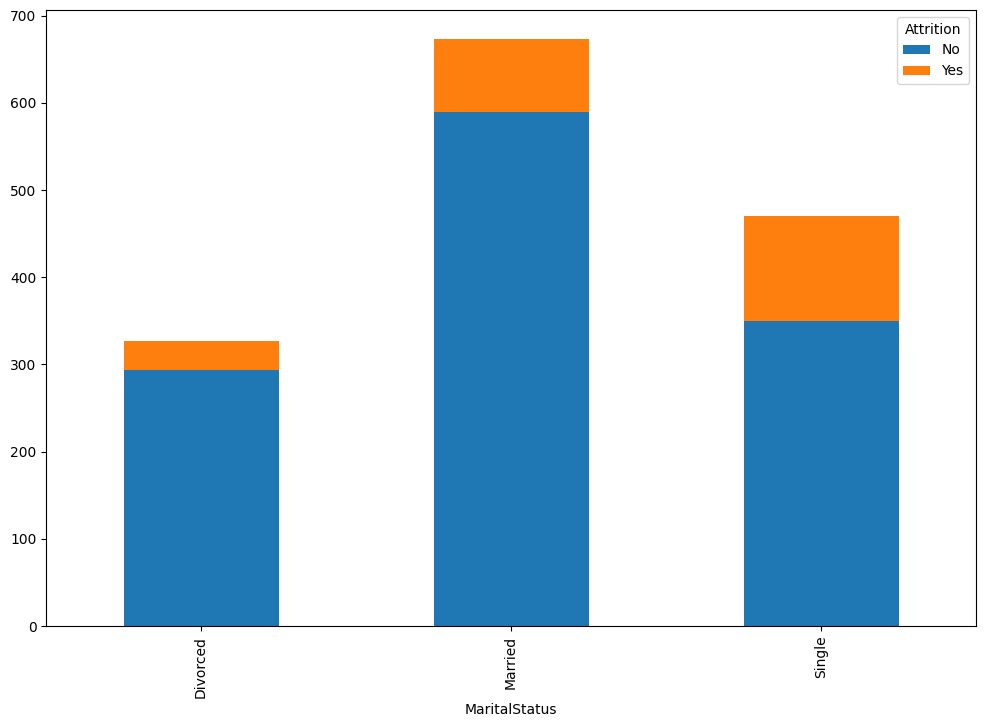

In [33]:
df.groupby(['MaritalStatus','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

**a)What do you think are the 3 factors behind employee attrition?**

**Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement** In this case study of IBM EMPLOYEE ATTRITION RATE, our interest is to check for the highest possible factors that can influence an heightened attrition rate at IBM. 
From the Analysis above;
it can be drawn that the three factors which leads to an high rate of Attrition are using the feature in the order of importance are:
**Job Satisfaction 
MonthlyIncome 
Age
Distance From Home**

MonthlyIncome: It can be seen that people who earn lesser have an higher attrition rate as they would be interested in scouting for companies that would pay much in order to increase their quality of living, while those earning higher are less likely to leave a company as they are well paid. 

Age: It can be seen that younger staffs have an higher tendency of Attrition has they are more in search of new opportunities than stability unlike staffs of older ages. 

Distance From Home: Distance from home has an high influence on Attrition has living far from the work place over time takes a toll on the staffs,hence workers have an higher chance of leaving a company thats very far from where they live. 

JobSatisfaction: is seen to have the highest influence on Attrition as employee tends to leave where they don't feel fulfilled working. it shows that irrespective of the level,an employee would leave a company if the Job isn't providing the satisfaction it should give. 



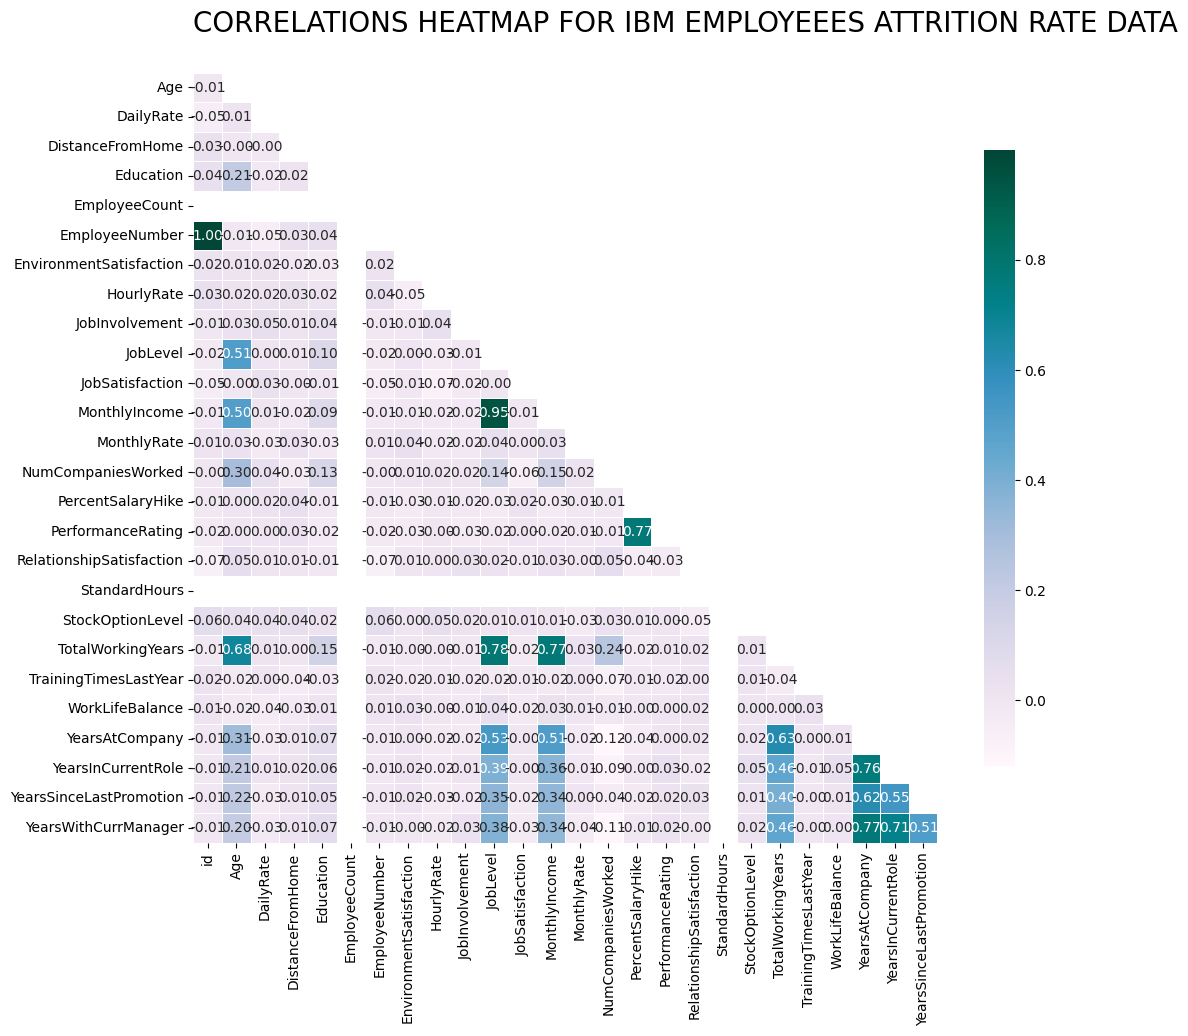

In [31]:
#Multivariate analysis: Numeric Variables 
corr= df.corr()
#using numpy function to mask the data
ones= np.ones_like(corr,dtype='bool')
mask=np.triu(ones)
#adjust mask and correlations
mask= mask[1:, :-1]
corr=corr.iloc[1:, :-1].copy()
#plot a customized heatmap of correlation for all numeric values
fig, ax=plt.subplots(figsize=[12,10])
sns.heatmap(corr, mask=mask, annot= True,fmt=".2f", cmap= 'PuBuGn', linewidths=.7, cbar_kws={'shrink':.8})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for IBM Employeees Attrition Rate data\n".upper(), fontsize=20, loc='left');


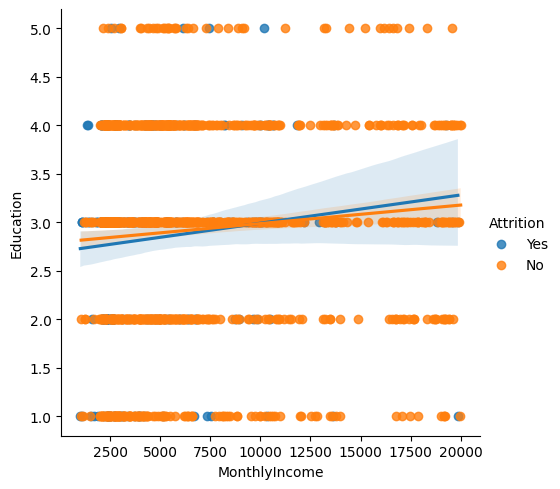

In [42]:
sns.lmplot(x = 'MonthlyIncome', y = 'Education', hue = 'Attrition', data= df) 


<AxesSubplot:ylabel='Education'>

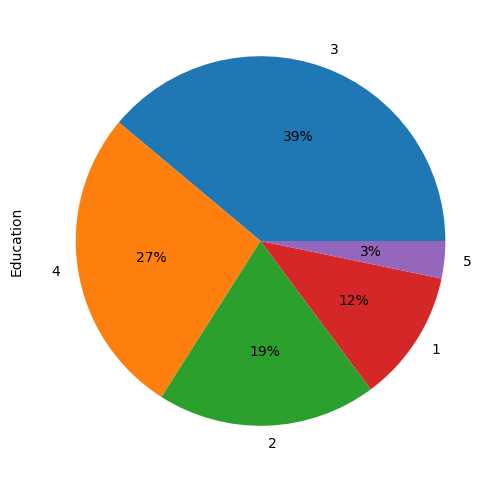

In [7]:
df.Education.value_counts().plot(kind='pie',
                                 autopct='%1.0f%%',
                                 figsize=(12, 6))

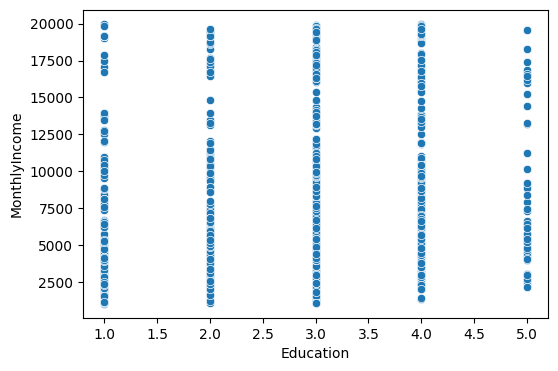

In [49]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, y='MonthlyIncome', x='Education');


**b)What is the relationship between Education and Monthly Income?**
From the heat map above it can be seen that the correlation between Education and Monthly Income is 0.09, which means there is a very weak relationship between Education and Monthly income. 
From the plots, it can be deduced that the Education of an employee has minimal effect on how much they earn. hence, it can be concluded that the relationship is a weak one almost negligible. 

<AxesSubplot:xlabel='Age'>

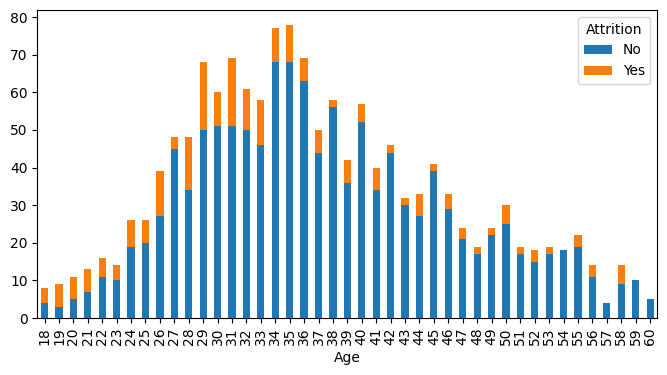

In [10]:
df.groupby(['Age','Attrition']).size().unstack().plot(kind='bar',
                                                        stacked=True,
                                                                    figsize=(8, 4))

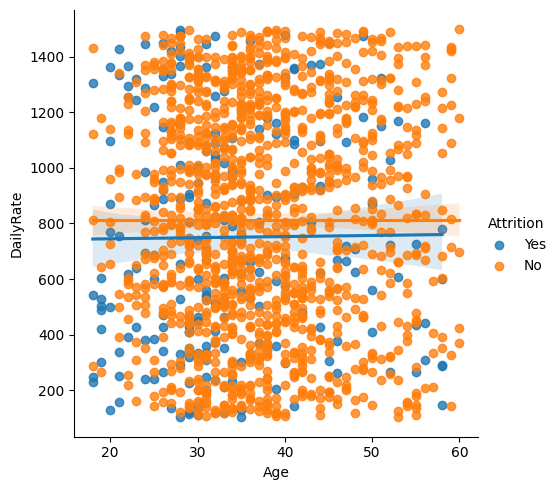

In [34]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df) 


**c)What is the effect of age on attrition?**
From the plot above, it shows that employees who are lesser than 50 years have higher chance of leaving IBM. its shows that the rate of attrition is highest amongst employees within the ages of 26-37 and there is no attrition amongst employees between the age bracket of 57,59 and 60 which could probably due to the fact that these groups are already close to retiring. 
having an high rate of attrition amongst employees between the ages of 18-56,58 means that retaining employees of younger ages should be a factor for the company to consider in order to reduce the rate at which young employees leave which in turn would help the company to retain talents and also reduce the amount of sourcing for talents and training. 

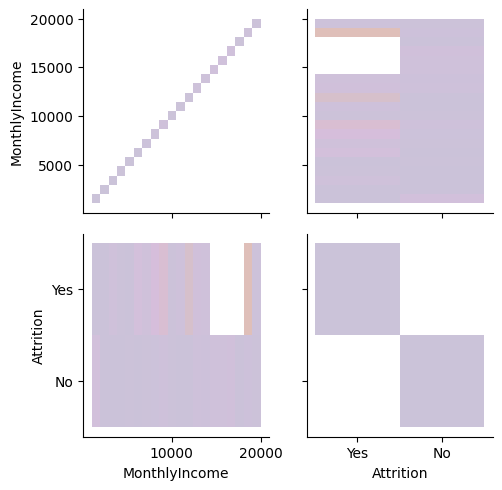

In [23]:
m= sns.PairGrid(data=df, vars =['MonthlyIncome','Attrition'], hue= 'MonthlyRate');
m.map(sns.histplot)

<AxesSubplot:ylabel='Frequency'>

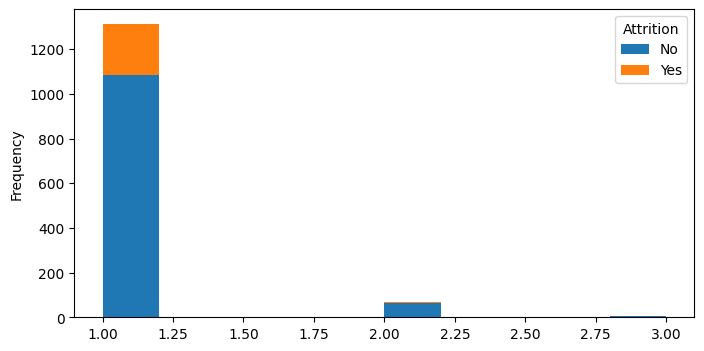

In [31]:
df.groupby(['MonthlyIncome','Attrition']).size().unstack().plot(kind='hist',
                                                        stacked=True,
                                                                    figsize=(8, 4))

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_30281/3453559960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

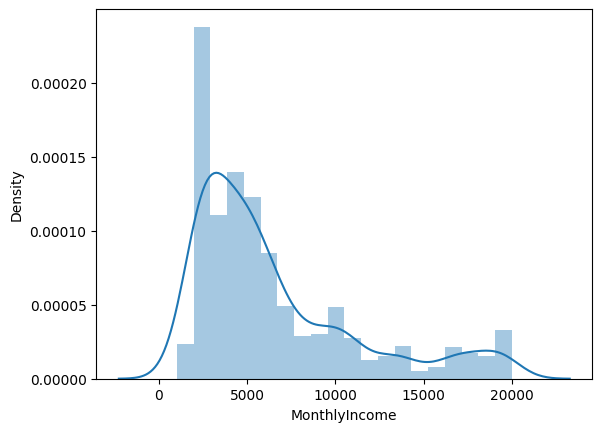

In [28]:
sns.distplot(df['MonthlyIncome'])

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_30281/3611163269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyRate'])


<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

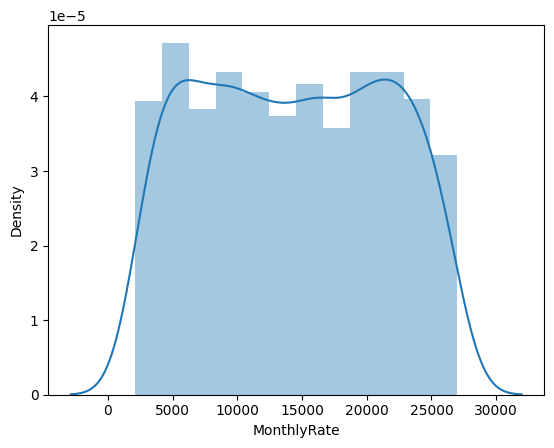

In [29]:
sns.distplot(df['MonthlyRate'])

<AxesSubplot:xlabel='StockOptionLevel'>

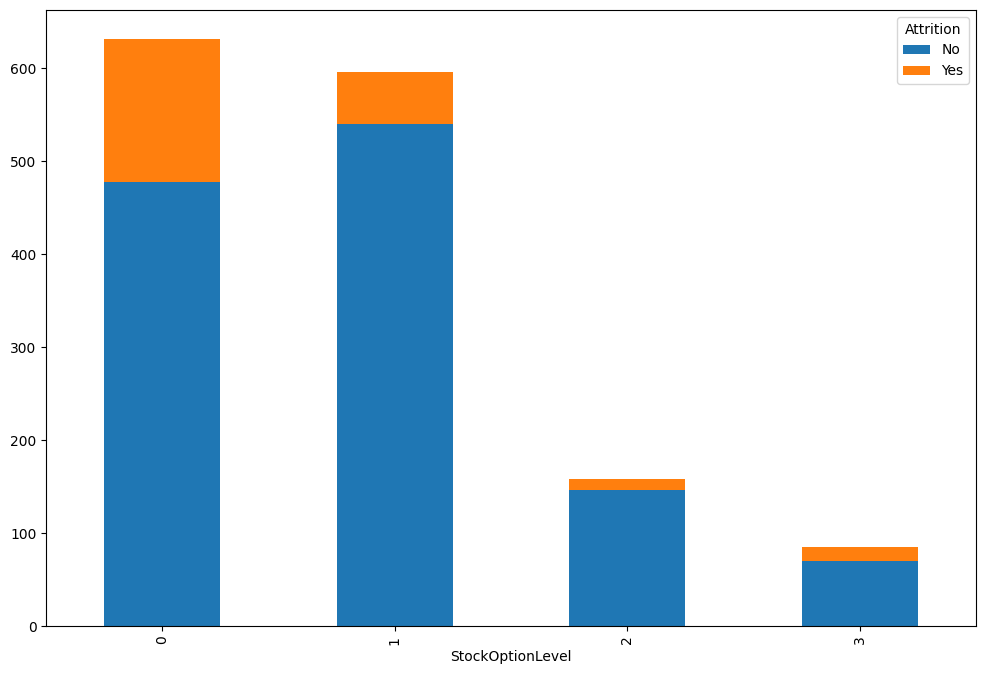

In [8]:
df.groupby(['StockOptionLevel','Attrition']).size().unstack().plot(kind='bar',
                                                                 stacked= True,
                                                                 figsize=(12, 8))

**d)Is Income the main factor in employee attrition?**
No, I think StockOptionLevel is the main factor is employee Attrition.


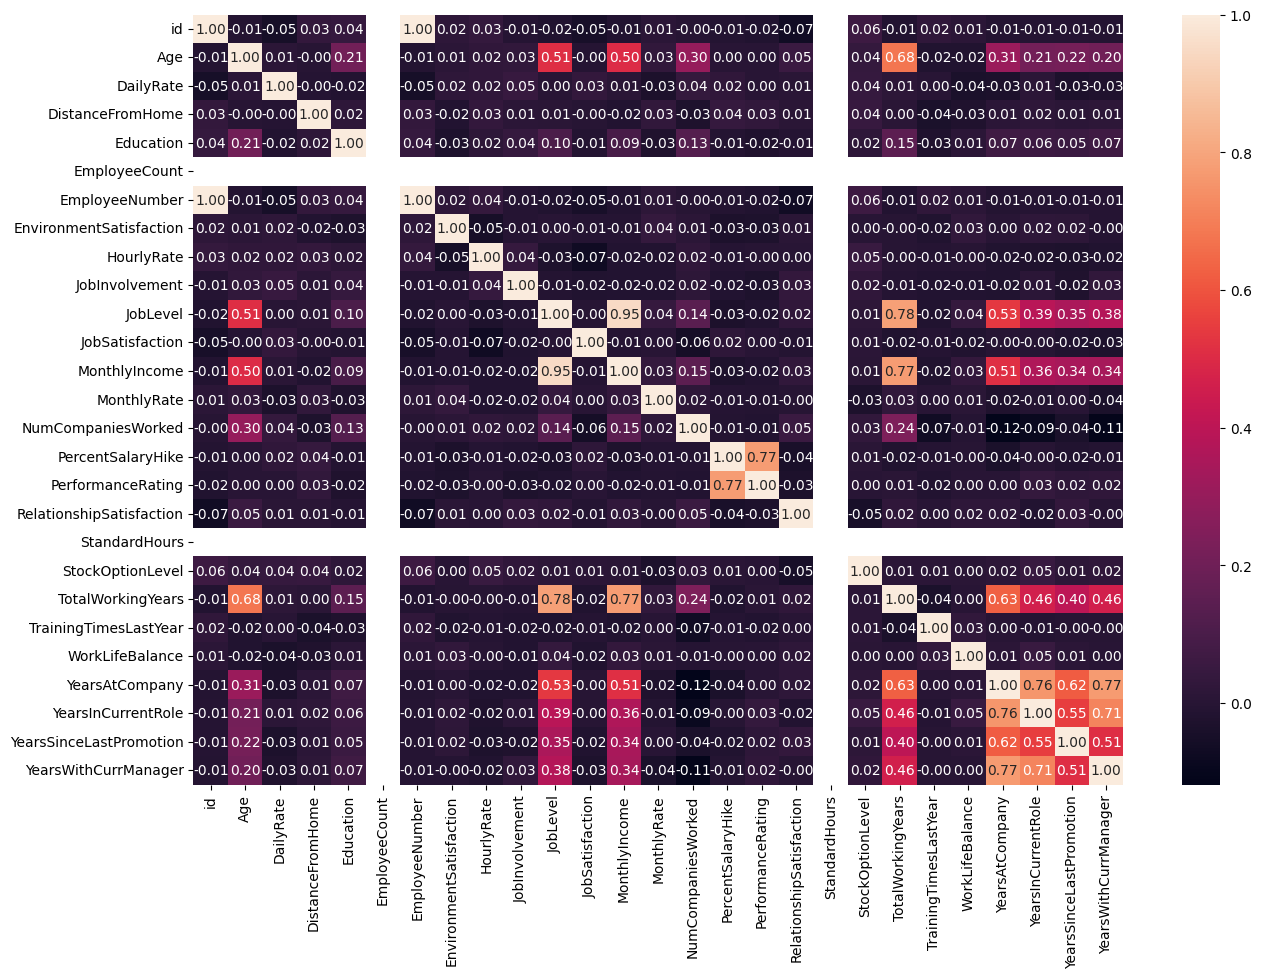

In [47]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True, fmt='.2f');


/data/user/0/ru.iiec.pydroid3/cache/ipykernel_30141/1116580849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WorkLifeBalance'])


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

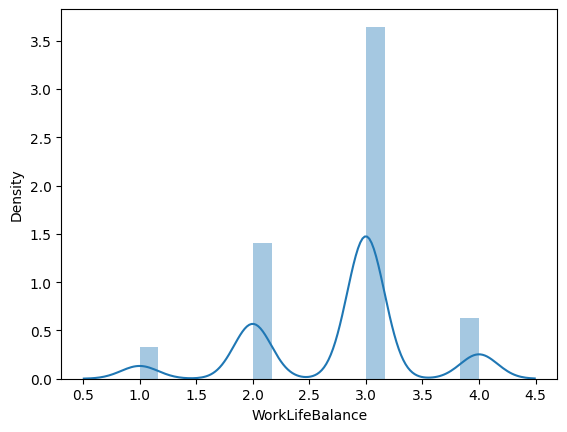

In [43]:
sns.distplot(df['WorkLifeBalance'])

<AxesSubplot:xlabel='WorkLifeBalance'>

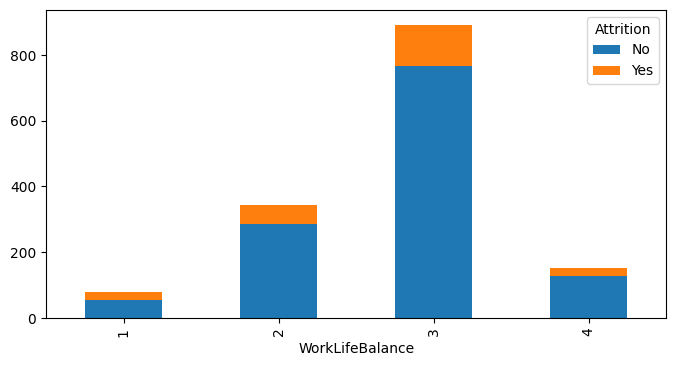

In [46]:
df.groupby(['WorkLifeBalance','Attrition']).size().unstack().plot(kind='bar',
                                                      stacked=True,
                                                                    figsize=(8, 4))

**e)How does work-life balance impact the overall attrition rate?**
from the heatmap above, WorkLifeBalance have an overwhelming impact on the overall Attrition rate reason been that it has a poor correlation to every other factor, hence other factors can't influence it. Irrespective of the age, Education, MonthlyIncome e.t.c, it means if theres a threat to Work life balance of an employee or once an employee doesn't have time for other things asides from his/her Job, there would be an high chance of the employee to leave as there would be little to anything that can be of influence or interest to make the employee want to stay, hence retaining employees would be difficult. 